In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("1000000 Sales Records.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Sub-Saharan Africa,Senegal,Baby Food,Offline,L,11/6/2010,575470578,12/11/2010,3387,255.28,159.42,864633.36,539955.54,324677.82
999996,Central America and the Caribbean,Panama,Office Supplies,Offline,C,1/12/2015,766942107,3/1/2015,4068,651.21,524.96,2649122.28,2135537.28,513585.00
999997,Europe,Norway,Office Supplies,Online,M,10/25/2011,685472047,12/5/2011,5266,651.21,524.96,3429271.86,2764439.36,664832.50
999998,Europe,Montenegro,Beverages,Offline,M,10/31/2010,946734225,12/8/2010,8551,47.45,31.79,405744.95,271836.29,133908.66


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1000000 non-null  object 
 1   Country         1000000 non-null  object 
 2   Item Type       1000000 non-null  object 
 3   Sales Channel   1000000 non-null  object 
 4   Order Priority  1000000 non-null  object 
 5   Order Date      1000000 non-null  object 
 6   Order ID        1000000 non-null  int64  
 7   Ship Date       1000000 non-null  object 
 8   Units Sold      1000000 non-null  int64  
 9   Unit Price      1000000 non-null  float64
 10  Unit Cost       1000000 non-null  float64
 11  Total Revenue   1000000 non-null  float64
 12  Total Cost      1000000 non-null  float64
 13  Total Profit    1000000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 106.8+ MB


In [4]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06
mean,5.493520e+08,4998.867302,266.025488,187.522978,1.329563e+06,9.372671e+05,3.922956e+05
std,2.599397e+08,2885.334142,216.987966,175.650798,1.468527e+06,1.148954e+06,3.788199e+05
min,1.000012e+08,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,3.239629e+08,2502.000000,81.730000,35.840000,2.778672e+05,1.617289e+05,9.510480e+04
50%,5.486524e+08,4998.000000,154.060000,97.440000,7.844445e+05,4.667818e+05,2.810549e+05
75%,7.745981e+08,7496.000000,421.890000,263.330000,1.822444e+06,1.196327e+06,5.653076e+05
max,9.999999e+08,10000.000000,668.270000,524.960000,6.682700e+06,5.249600e+06,1.738700e+06


In [5]:
df.duplicated().sum()

50009

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
print(df.describe(include=['object']))

                    Region  Country Item Type Sales Channel Order Priority  \
count              1000000  1000000   1000000       1000000        1000000   
unique                   7      185        12             2              4   
top     Sub-Saharan Africa   Panama    Fruits       Offline              C   
freq                259953     5606     83551        500249         250313   

        Order Date  Ship Date  
count      1000000    1000000  
unique        2767       2817  
top     11/25/2016  8/14/2015  
freq           430        420  


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate order fulfillment time
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract temporal features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.weekday


df


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Days to Ship,Order Year,Order Month,Order Day,Order Weekday
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,2012-07-27,443368995,2012-07-28,1593,9.33,6.92,14862.69,11023.56,3839.13,1,2012,7,27,4
1,Middle East and North Africa,Morocco,Clothes,Online,M,2013-09-14,667593514,2013-10-19,4611,109.28,35.84,503890.08,165258.24,338631.84,35,2013,9,14,5
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,2015-05-15,940995585,2015-06-04,360,421.89,364.69,151880.40,131288.40,20592.00,20,2015,5,15,4
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,2017-05-17,880811536,2017-07-02,562,109.28,35.84,61415.36,20142.08,41273.28,46,2017,5,17,2
4,Europe,Slovakia,Beverages,Offline,L,2016-10-26,174590194,2016-12-04,3973,47.45,31.79,188518.85,126301.67,62217.18,39,2016,10,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Sub-Saharan Africa,Senegal,Baby Food,Offline,L,2010-11-06,575470578,2010-12-11,3387,255.28,159.42,864633.36,539955.54,324677.82,35,2010,11,6,5
999996,Central America and the Caribbean,Panama,Office Supplies,Offline,C,2015-01-12,766942107,2015-03-01,4068,651.21,524.96,2649122.28,2135537.28,513585.00,48,2015,1,12,0
999997,Europe,Norway,Office Supplies,Online,M,2011-10-25,685472047,2011-12-05,5266,651.21,524.96,3429271.86,2764439.36,664832.50,41,2011,10,25,1
999998,Europe,Montenegro,Beverages,Offline,M,2010-10-31,946734225,2010-12-08,8551,47.45,31.79,405744.95,271836.29,133908.66,38,2010,10,31,6


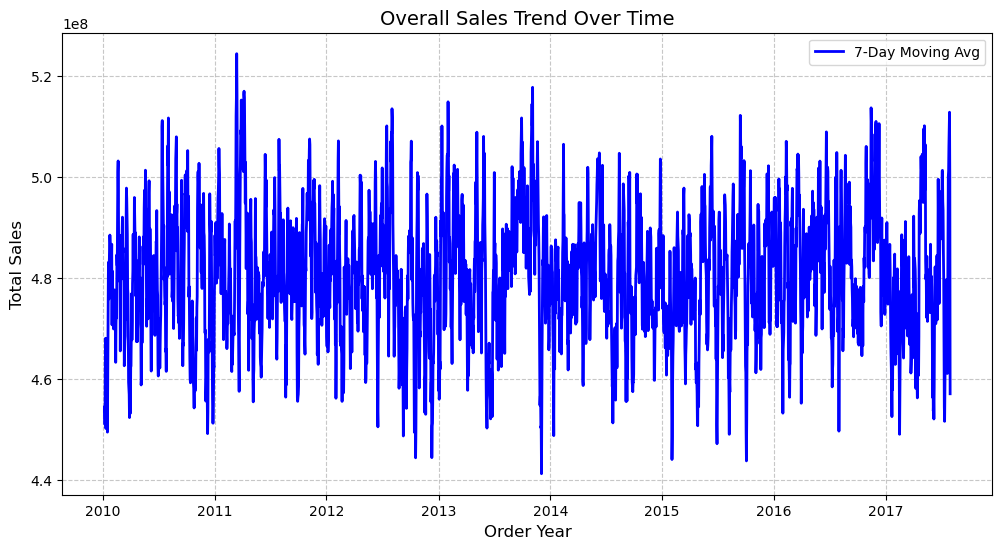

In [10]:
sales_trend = df.groupby('Order Date')['Total Revenue'].sum().reset_index()
sales_trend['Smoothed_Sales'] = sales_trend['Total Revenue'].rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Smoothed_Sales'], color='blue', linewidth=2, label="7-Day Moving Avg")
plt.title('Overall Sales Trend Over Time', fontsize=14)
plt.xlabel('Order Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

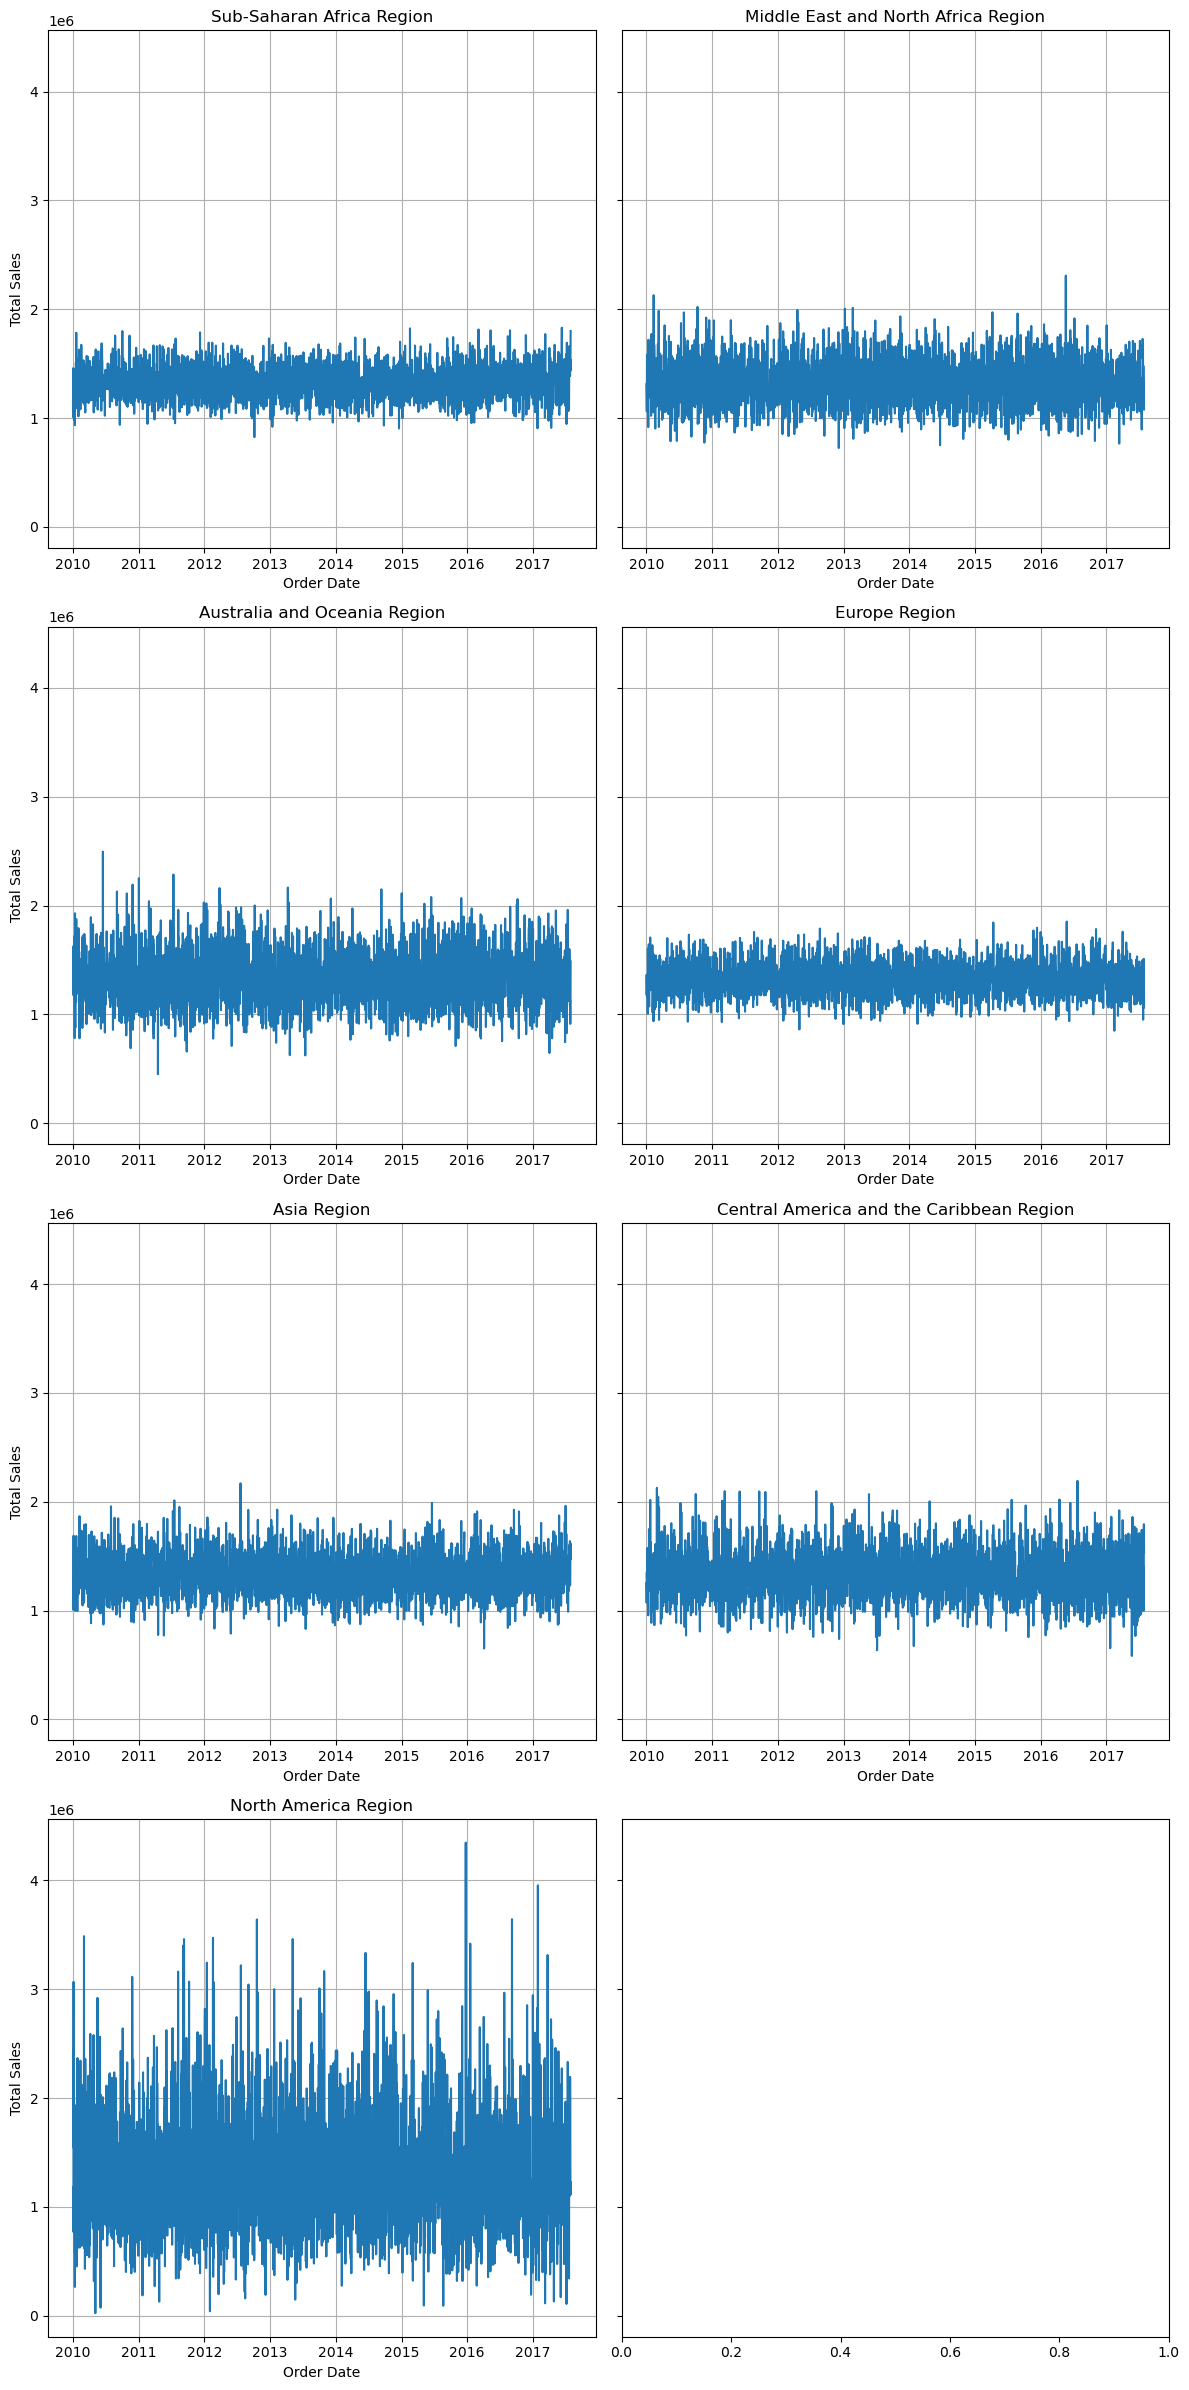

In [11]:
# Sales Trend by Region
regions = df['Region'].unique()
num_regions = len(regions)
num_rows = (num_regions + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows), sharey=True)
axes = axes.flatten()
for ax, region in zip(axes, regions):
    region_data = df[df['Region'] == region]
    sns.lineplot(data=region_data, x='Order Date', y='Total Revenue', ax=ax, errorbar=None)
    ax.set_title(f'{region} Region')
    ax.set_xlabel('Order Date')
    ax.set_ylabel('Total Sales')
    ax.grid(True)
plt.tight_layout()
plt.show()

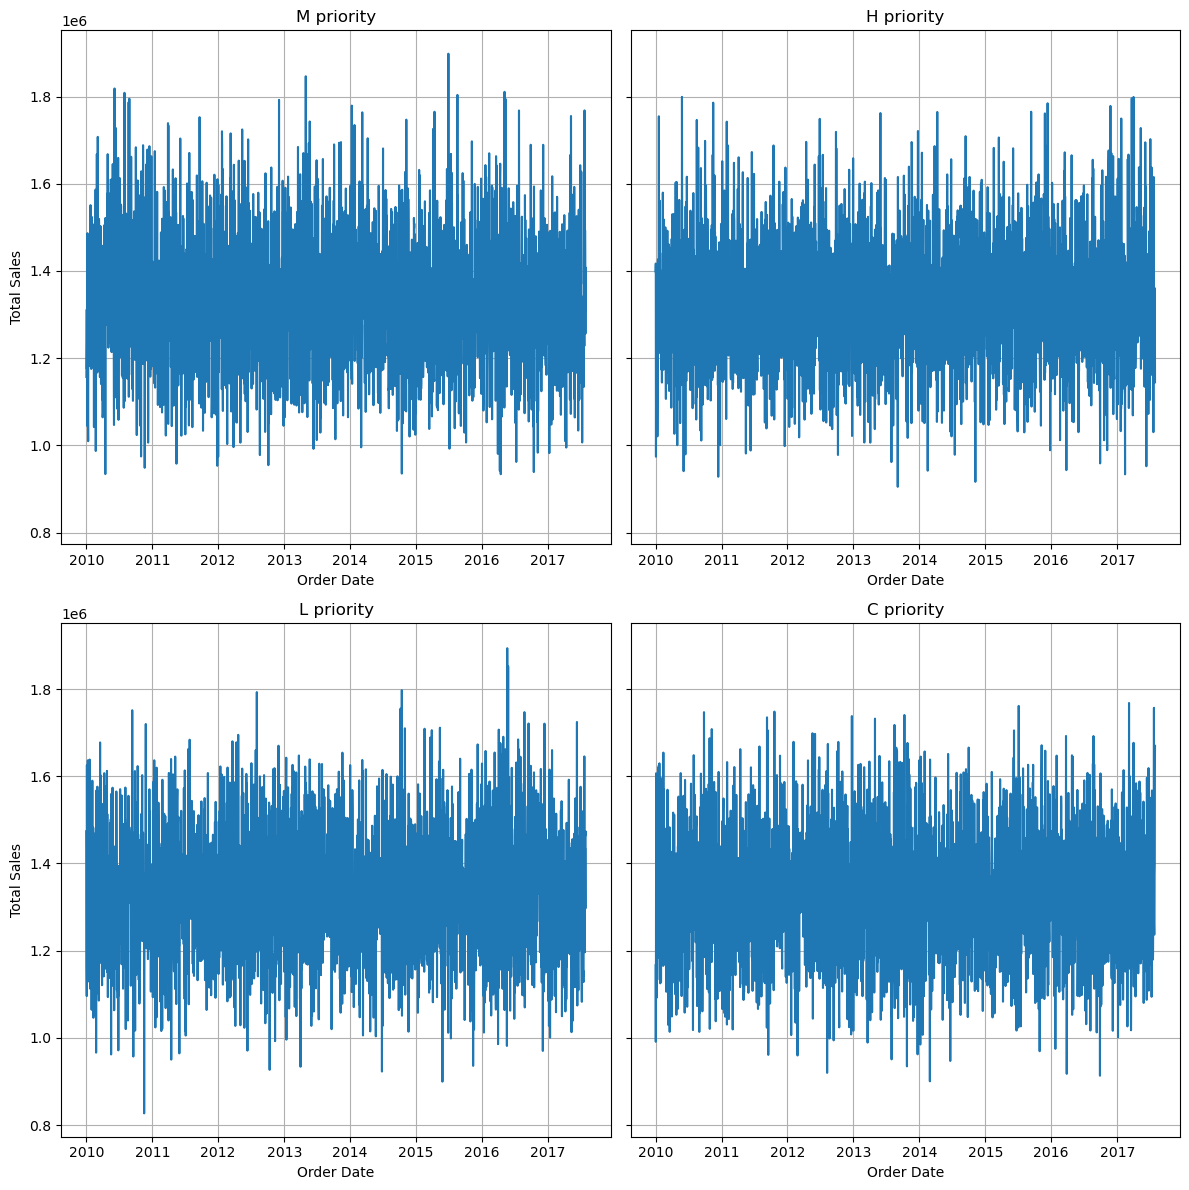

In [14]:
# Sales Trend by Region
pirorites = df['Order Priority'].unique()
num_pirorites = len(pirorites)
num_rows = (num_pirorites + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows), sharey=True)
axes = axes.flatten()
for ax, priority in zip(axes, pirorites):
    priority_data = df[df['Order Priority'] == priority]
    sns.lineplot(data=priority_data, x='Order Date', y='Total Revenue', ax=ax, errorbar=None)
    ax.set_title(f'{priority} priority')
    ax.set_xlabel('Order Date')
    ax.set_ylabel('Total Sales')
    ax.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df['Item Type'].unique()

array(['Fruits', 'Clothes', 'Meat', 'Beverages', 'Office Supplies',
       'Cosmetics', 'Snacks', 'Personal Care', 'Household', 'Vegetables',
       'Baby Food', 'Cereal'], dtype=object)

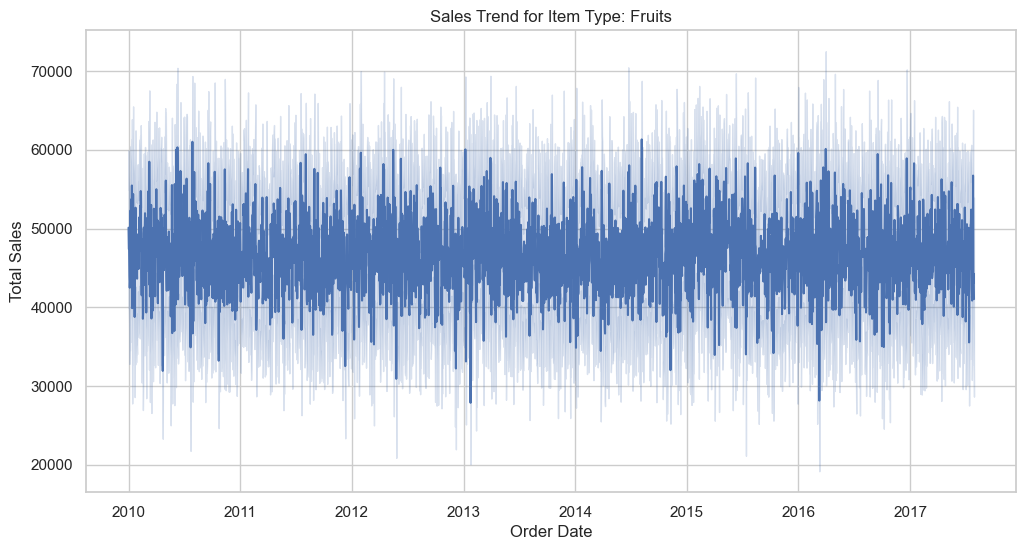

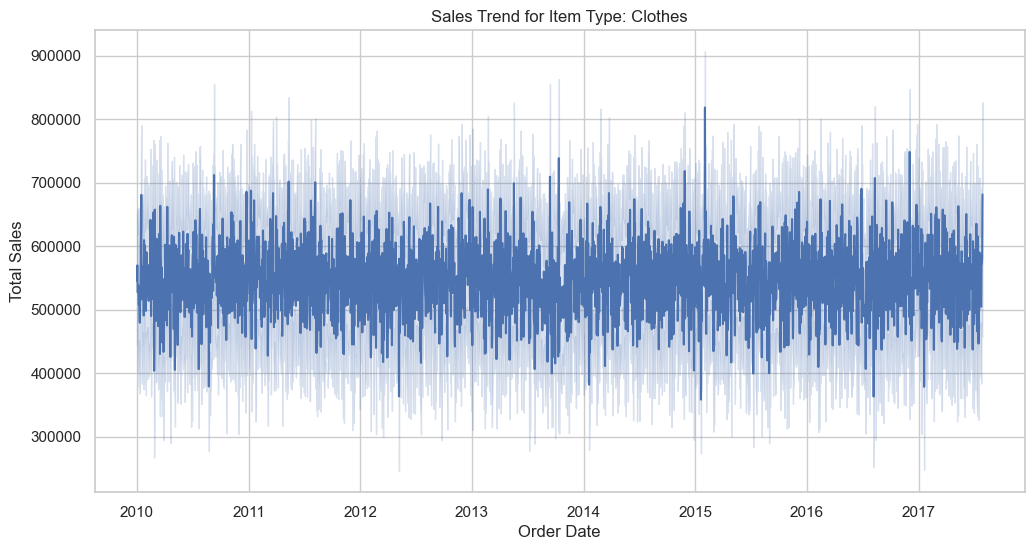

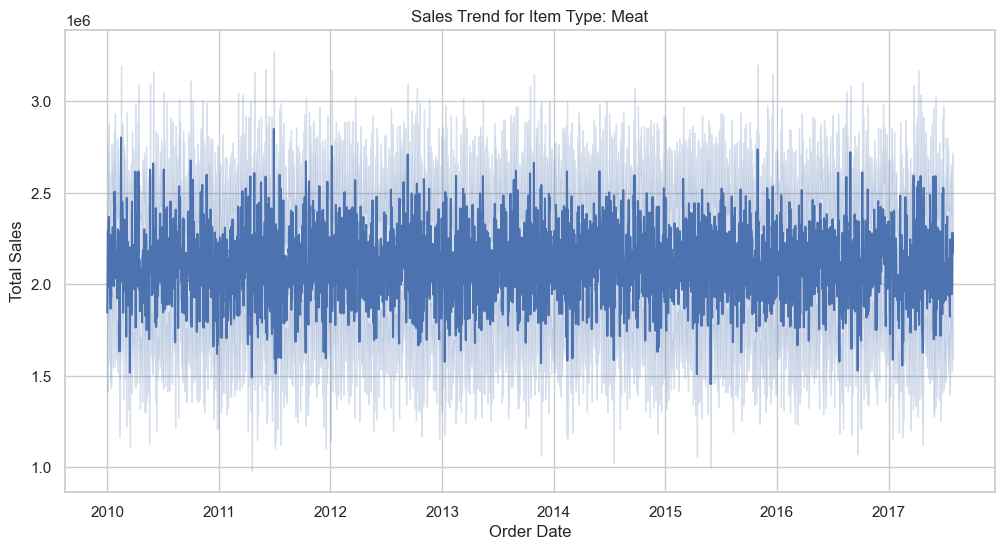

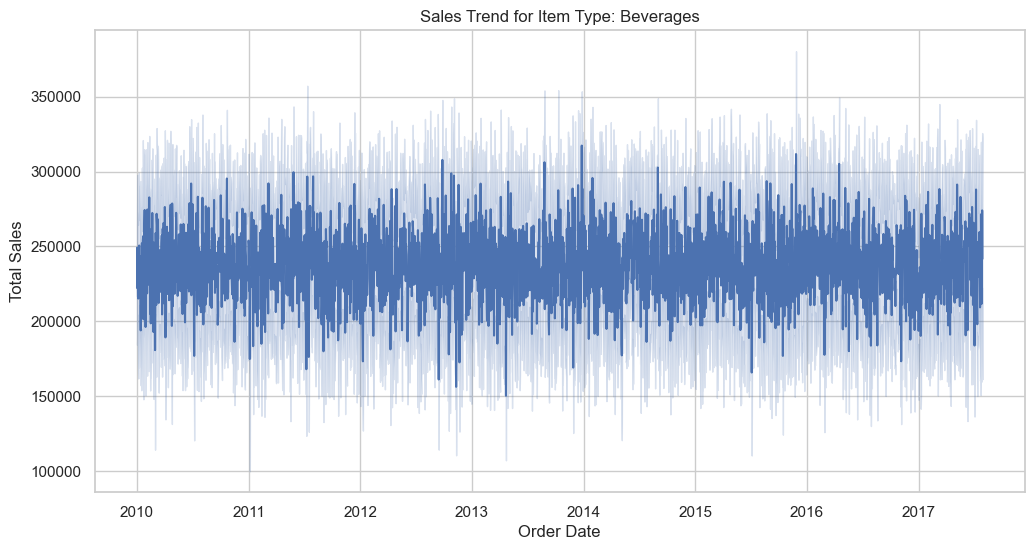

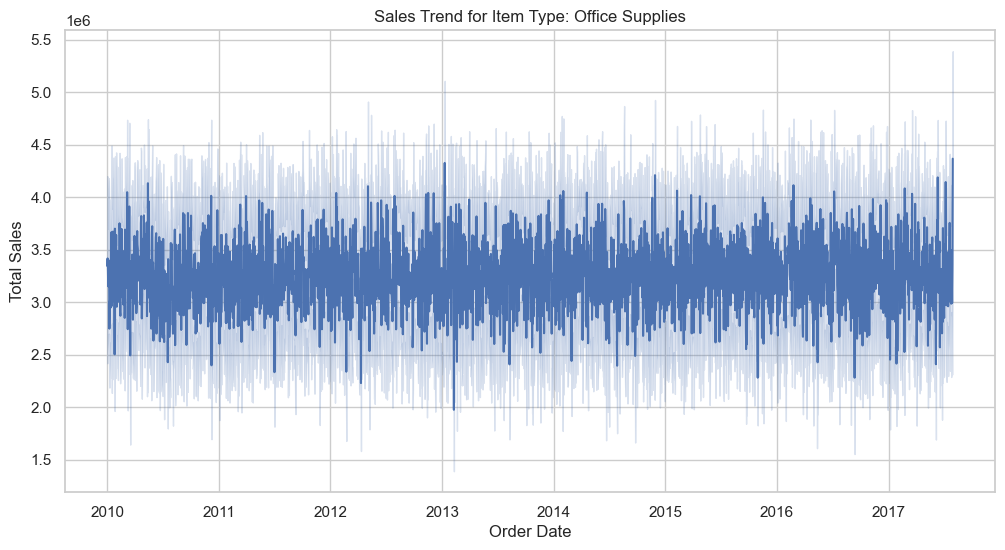

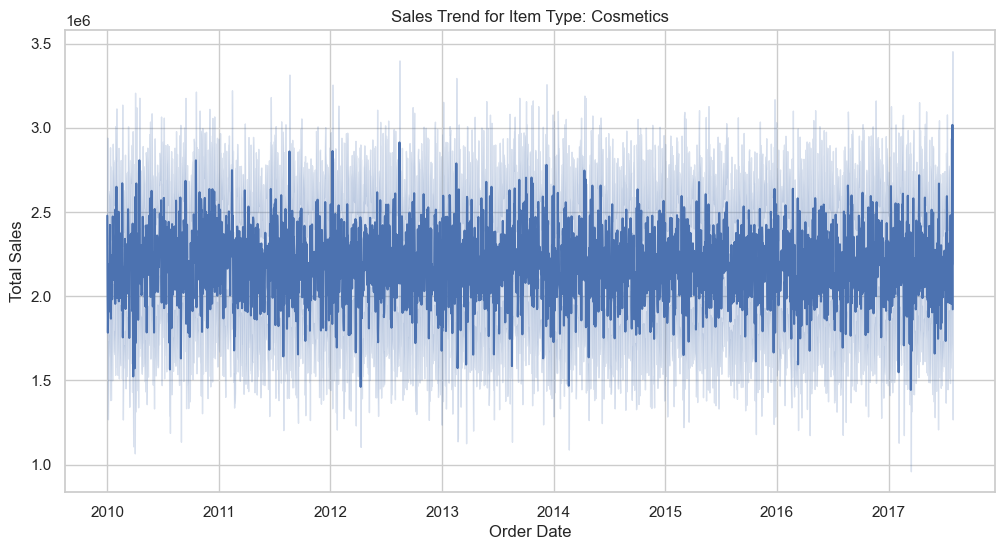

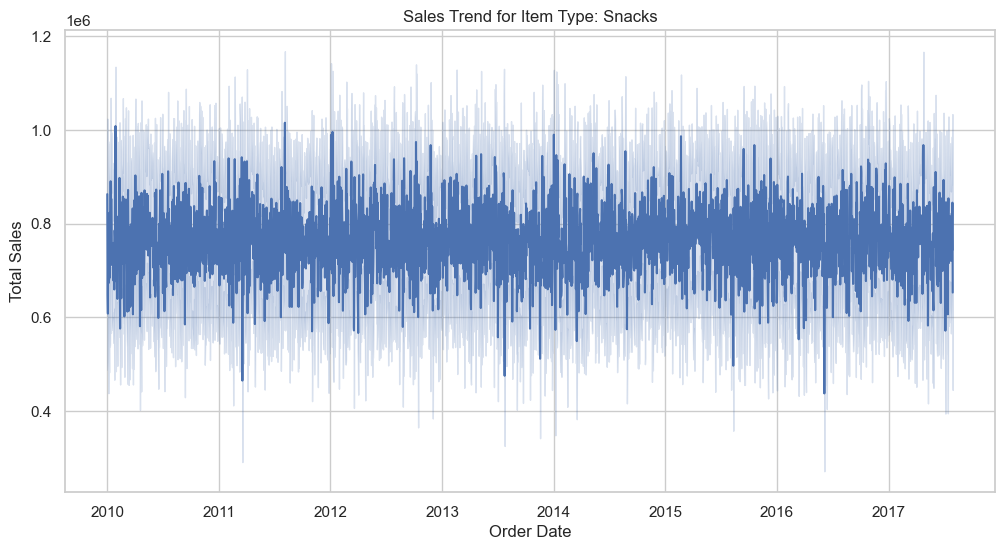

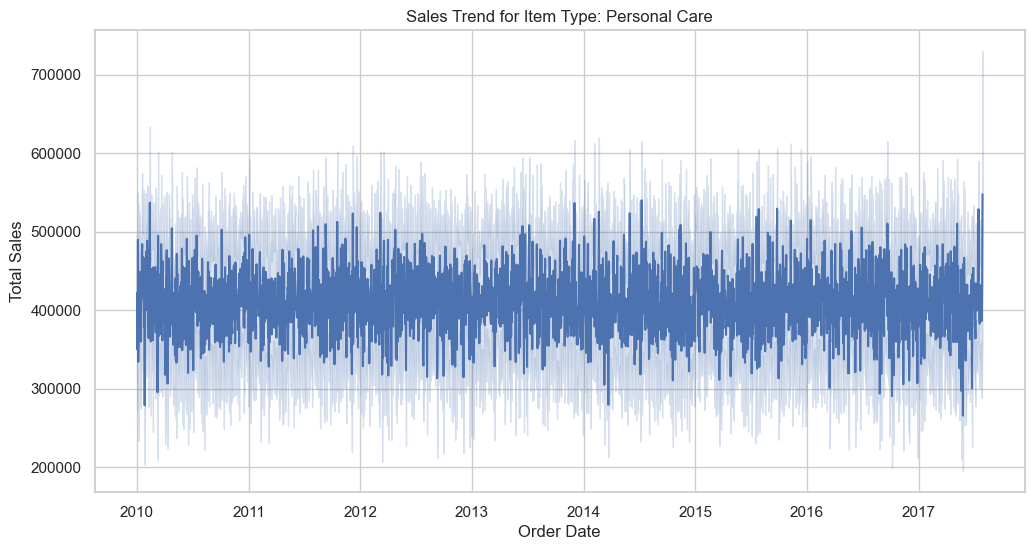

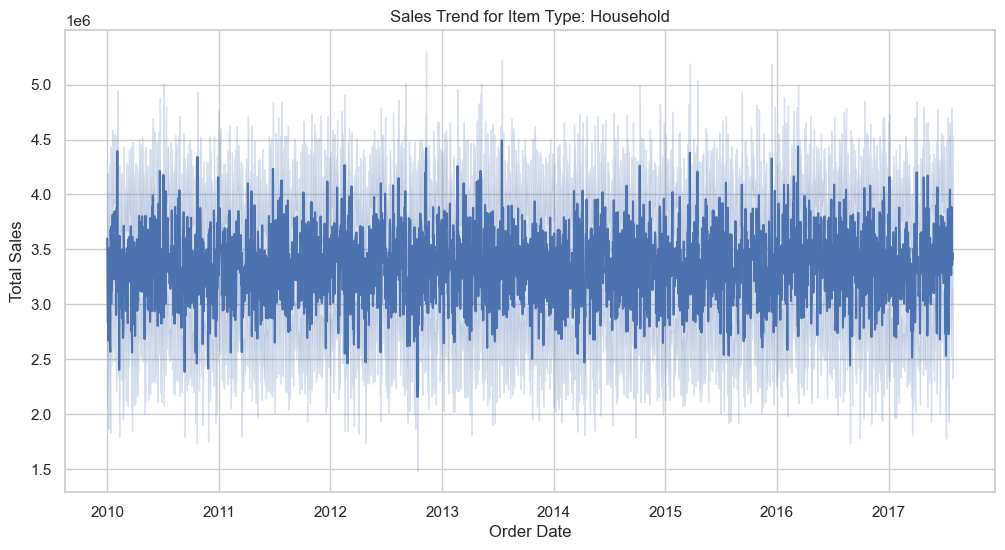

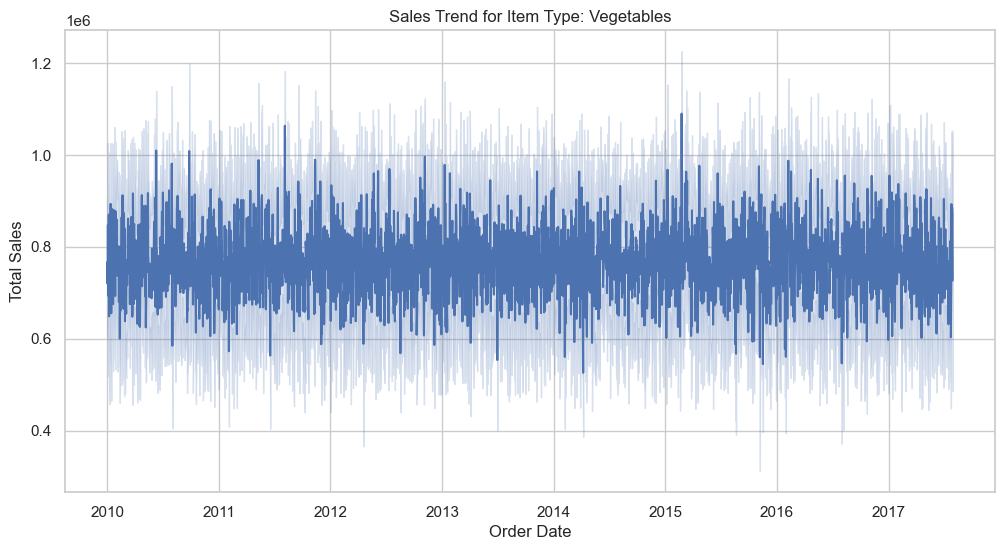

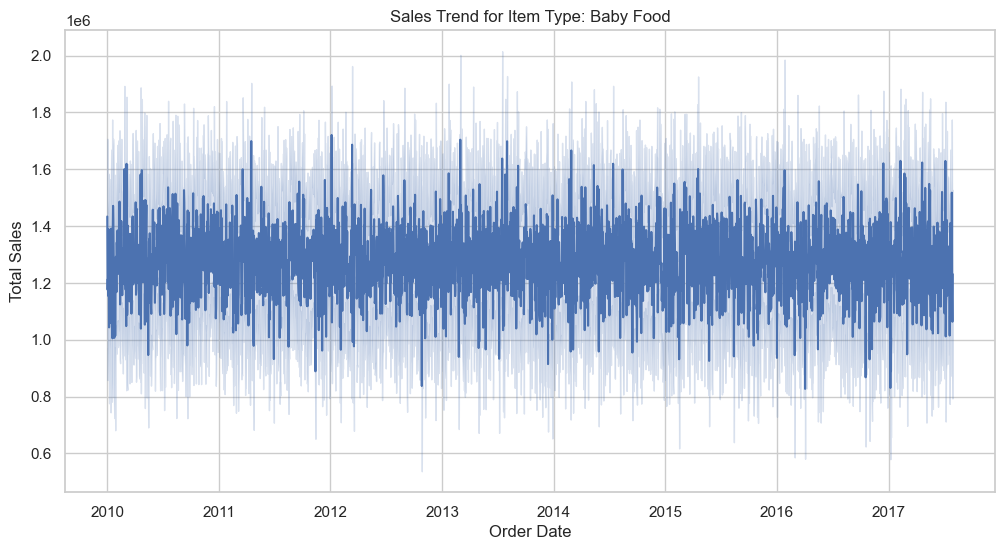

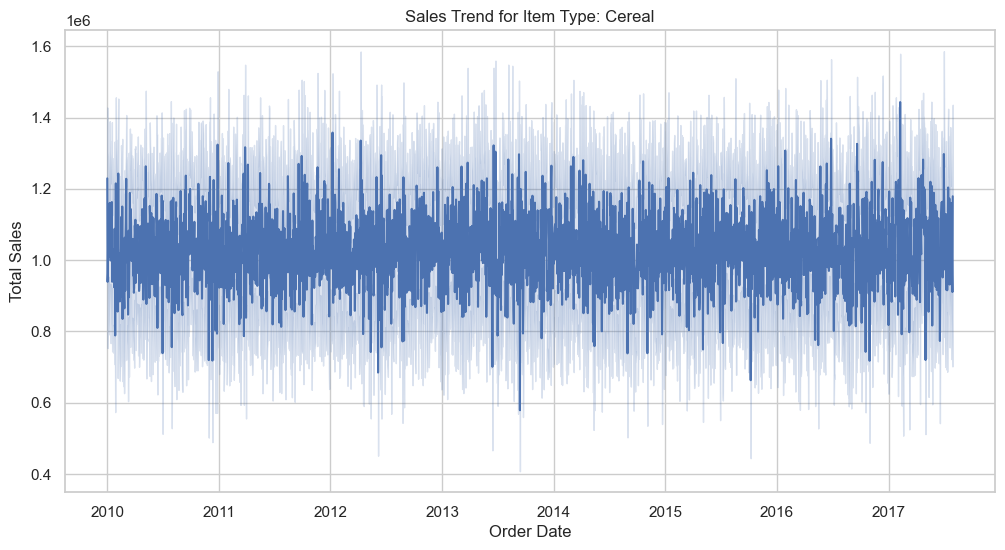

In [20]:
# Sales Trend by Category
for category in df['Item Type'].unique():
    plt.figure(figsize=(12, 6))
    subset = df[df['Item Type'] == category]
    sns.lineplot(data=subset, x='Order Date', y='Total Revenue')
    plt.title(f'Sales Trend for Item Type: {category}')
    plt.xlabel('Order Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

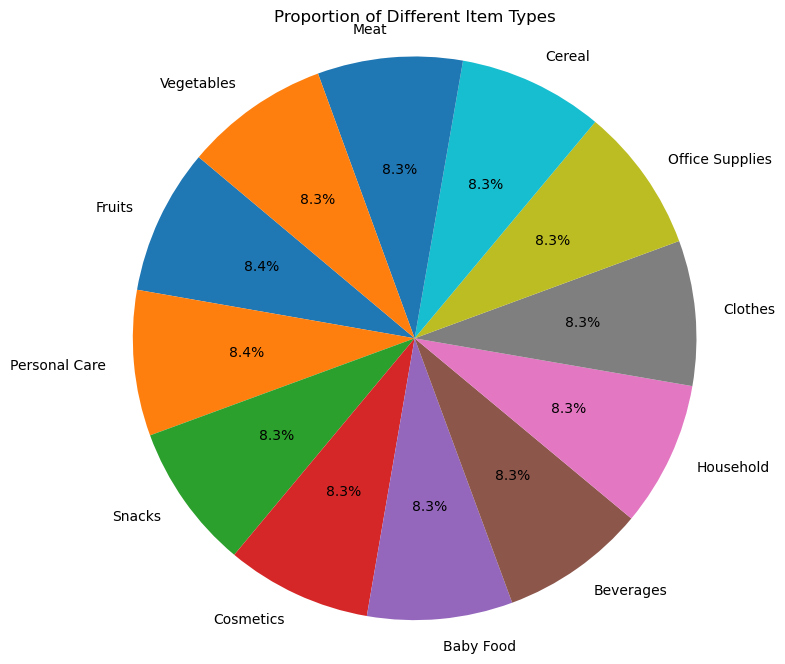

In [8]:
membership_counts = df['Item Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Item Types')
plt.axis('equal')
plt.show()

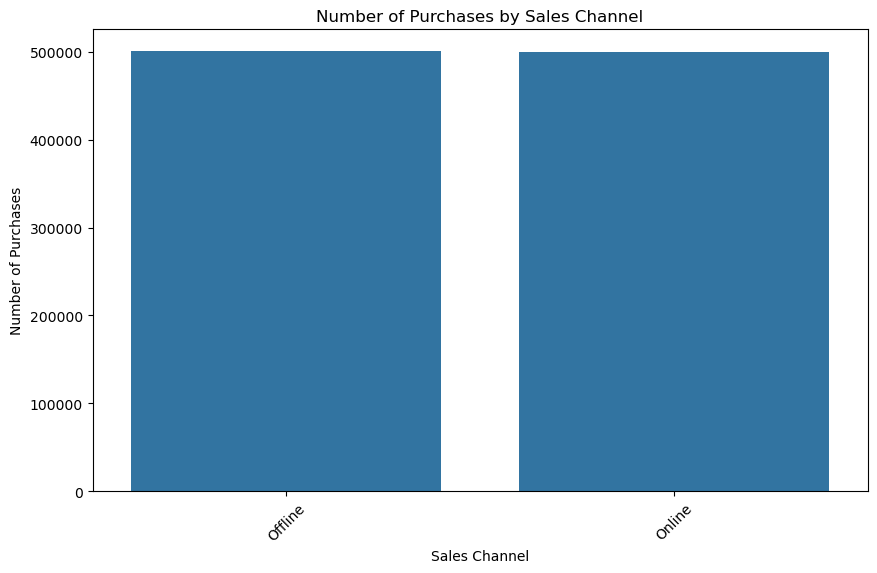

In [13]:
referral_purchases = df['Sales Channel'].value_counts().reset_index()
referral_purchases.columns = ['Sales Channel', 'Count']

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=referral_purchases, x='Sales Channel', y='Count')
plt.title('Number of Purchases by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

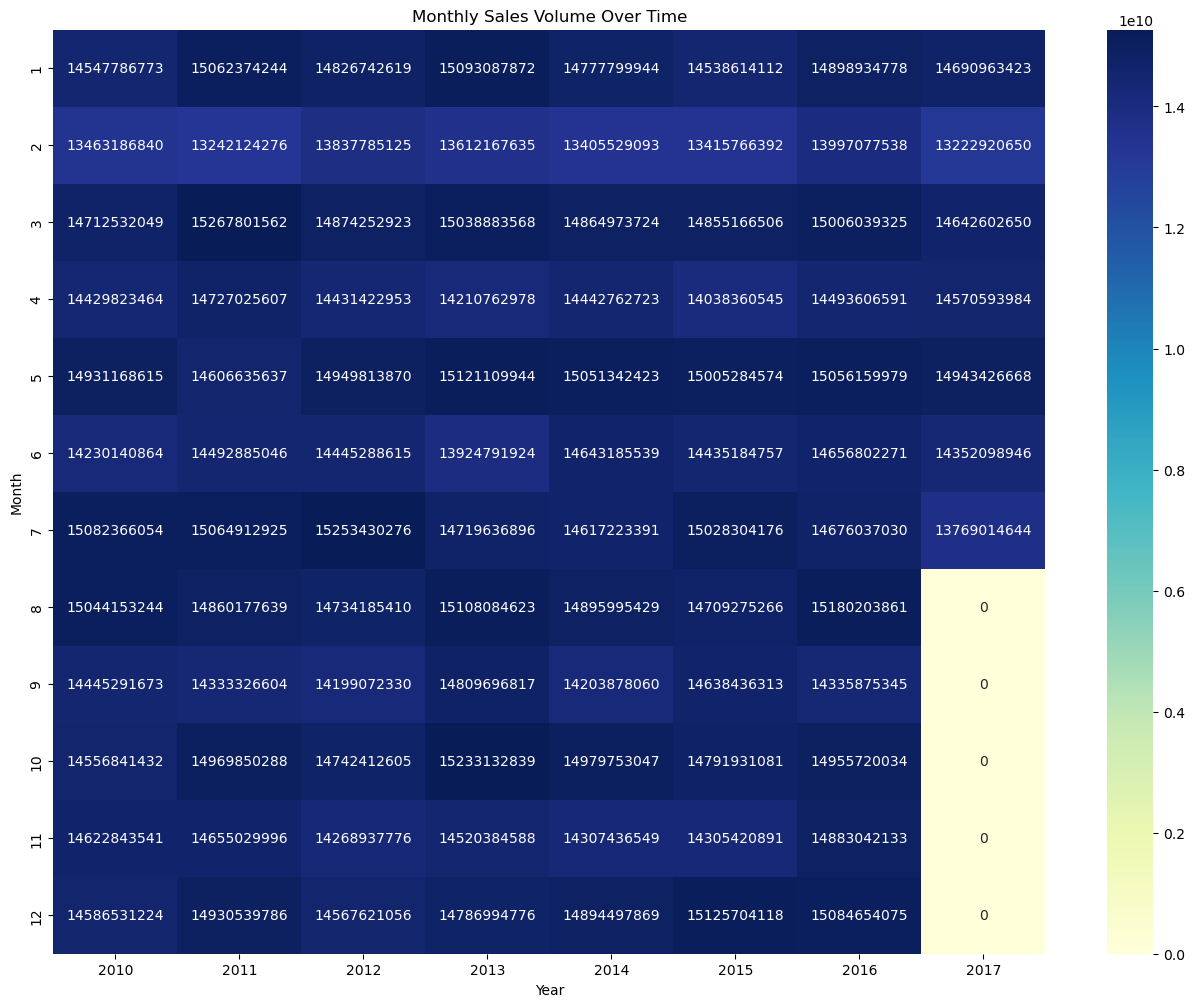

In [17]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().unstack(level=0).fillna(0)


plt.figure(figsize=(16, 12))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

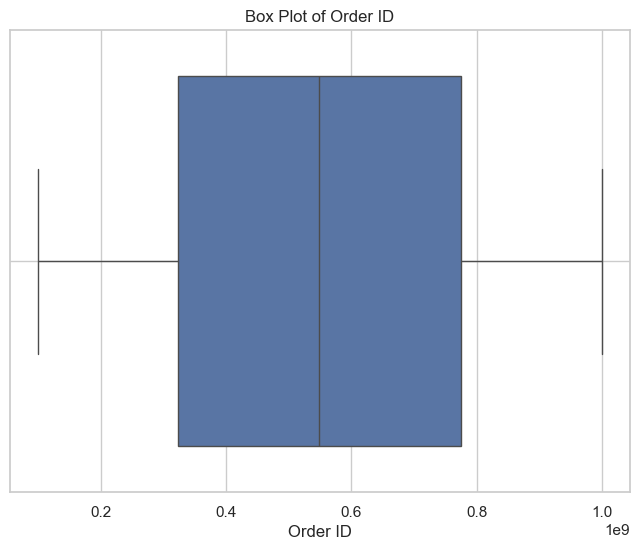

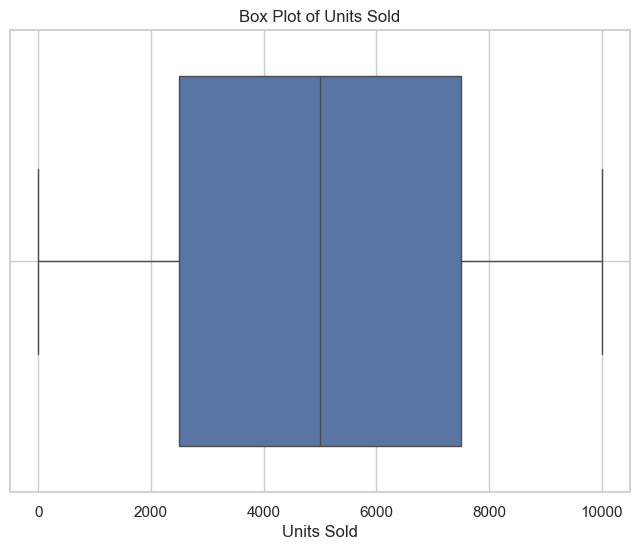

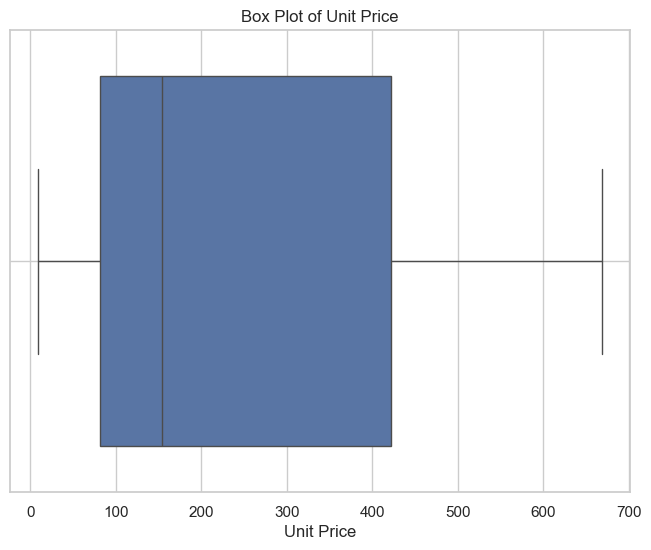

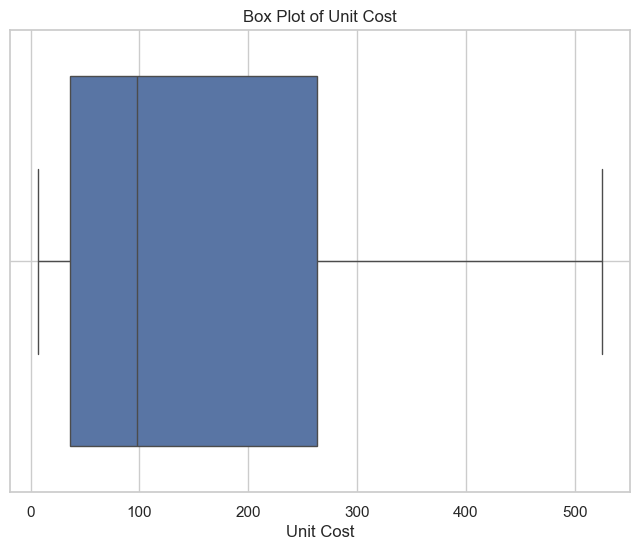

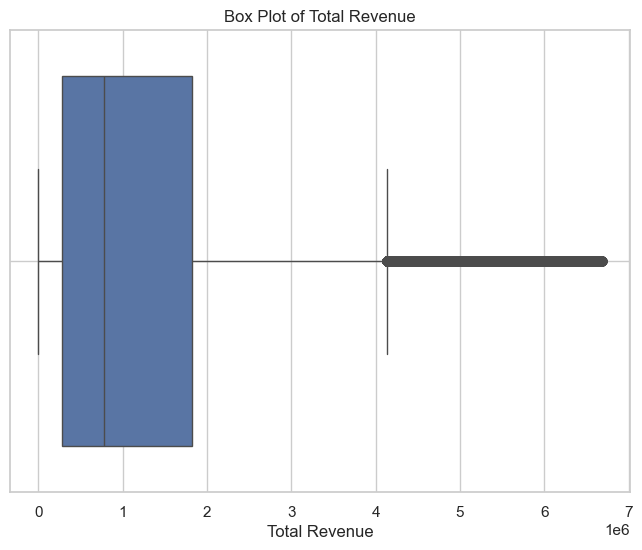

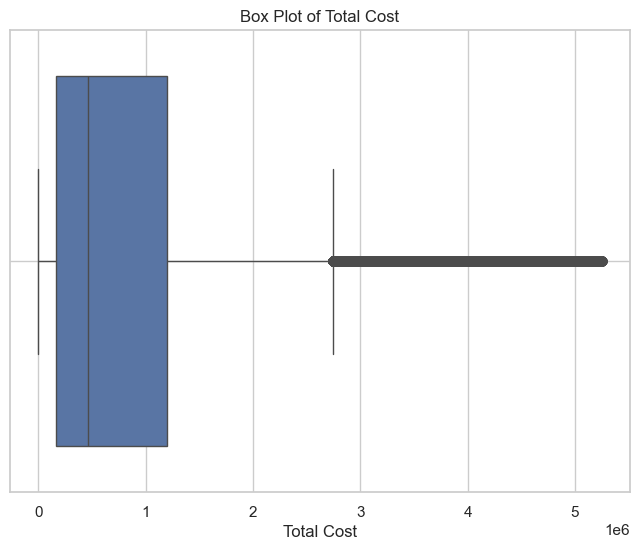

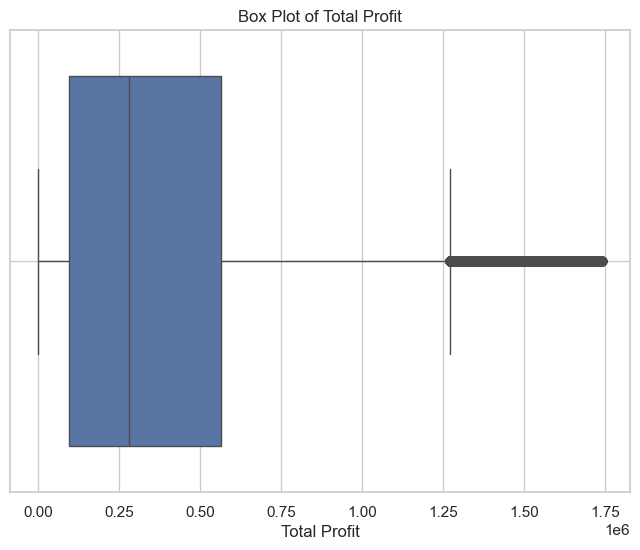

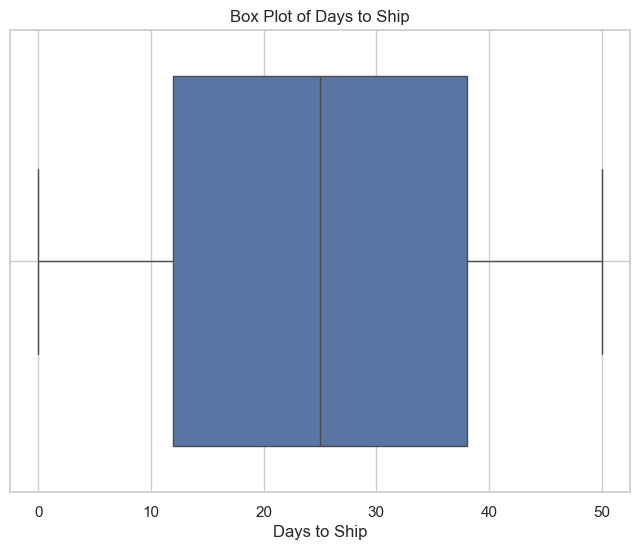

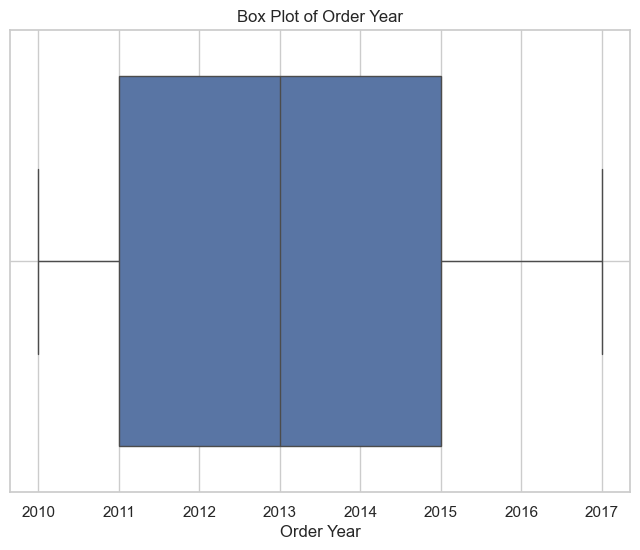

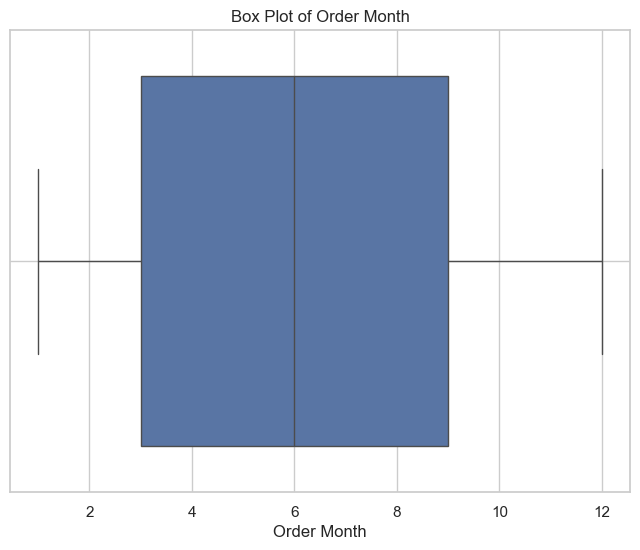

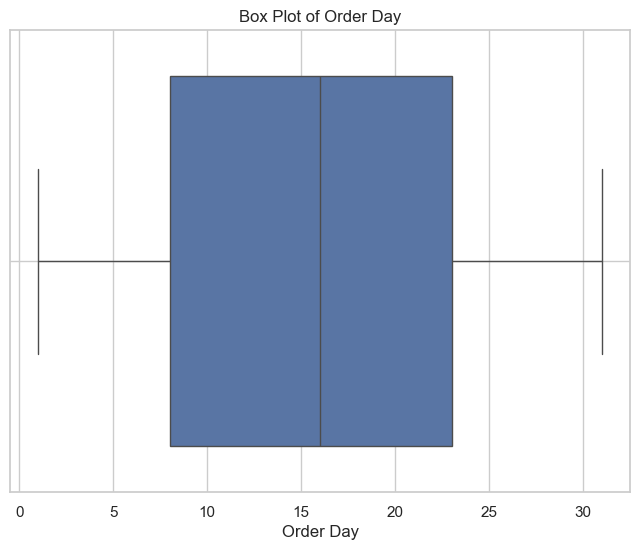

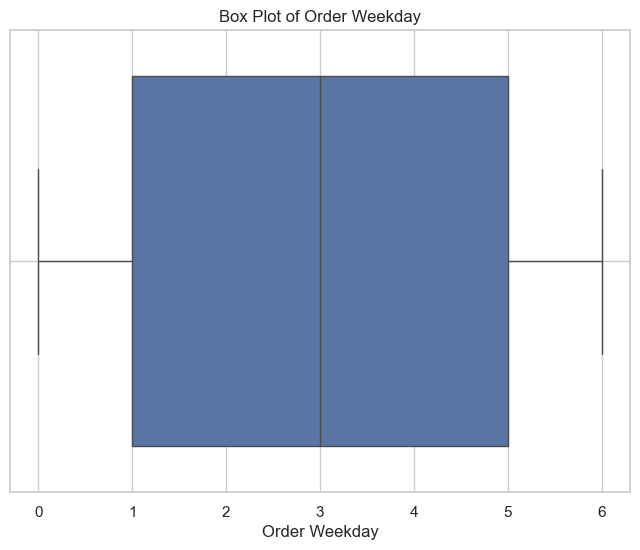

In [18]:
sns.set(style="whitegrid")

# Plotting box plots for numerical columns
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    
 
 
    
    plt.grid(True)  
    plt.show()

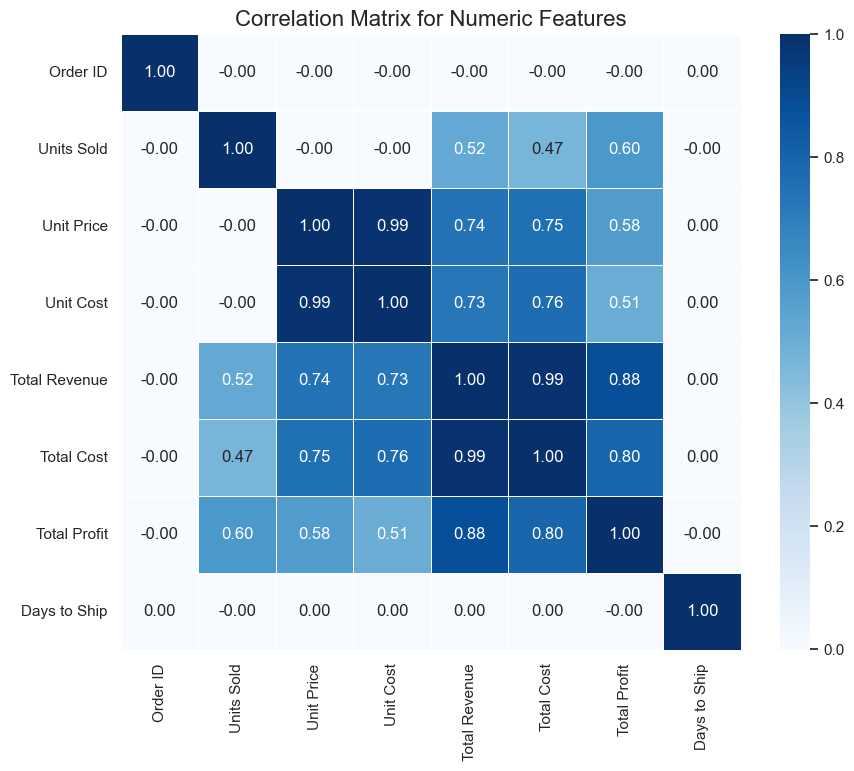

In [19]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix for Numeric Features', size=16)
plt.show()